<a href="https://colab.research.google.com/github/su92-msaiw-f25-006-boop/lessons-learned/blob/Email_Classification_NN/Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import important libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

**DataSet Ready**

In [2]:
data = {
    'text': [
        "Free money offer", "Hi, how are you?", "Win cash prizes",
        "Meeting tomorrow", "Cheap loans available", "Let's have lunch",
        "Congratulations, you won!", "Project deadline extended",
        "Claim your free gift", "See you soon"
    ],
    'label': ["spam","ham","spam","ham","spam","ham","spam","ham","spam","ham"]
}

**Convert to DataFrame**

In [3]:
df = pd.DataFrame(data)

**Raw Data Visualization**

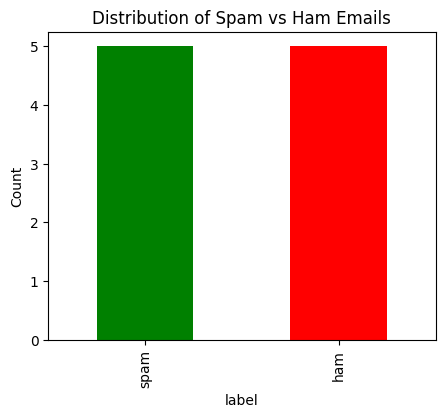

In [4]:
plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Distribution of Spam vs Ham Emails")
plt.ylabel("Count")
plt.show()

**Text Preprocessing**

In [5]:
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(df['text']).toarray()

**Label Encoding**

In [6]:
encoder = LabelEncoder()
y_labels = encoder.fit_transform(df['label'])

**Convert to PyTorch Tensors**




In [8]:
X_tensor = torch.tensor(X_features, dtype=torch.float32)
y_tensor = torch.tensor(y_labels, dtype=torch.float32)

**Split into Training and Test Data**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

Training samples: 8 Test samples: 2
